In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import gaussian_kde
import numpy as np
import os
import glob

In [2]:
filenames = glob.glob('fragments/*.fragments.tsv.gz')
samples = [item.replace(".sinto.fragments.tsv.gz", "") for item in filenames]
samples = [item.replace("fragments/", "") for item in samples]
samplenames = samples
ncells = 2000
titles = samples

In [3]:
for samplename in samplenames:
    fragments_filename = filenames[samplenames.index(samplename)]
    df = pd.read_csv(fragments_filename, delimiter ='\t', header=None, names=['chrom', 'begin', 'end', 'bc', 'count'])
    # Extract species from chromosome column.
    df['species'] = df['chrom'].str.split("_", n=1, expand=True)[0]
    #df.groupby(['bc', 'species']).sum()
    # Group first by barcode, then by species and count number of fragments found for each barcode per species.
    df_barnyard = df.groupby(['bc', 'species']).sum()['count'].unstack(level=-1, fill_value=0)
    df_barnyard['sum'] = df_barnyard.sum(axis=1)
    df_barnyard = df_barnyard.sort_values(by=['sum'], ascending = False)
    
    # linear
    x = df_barnyard['GRCh38']
    y = df_barnyard['mm10']
    plt.figure(figsize=(6, 6), dpi=150)

    sns.scatterplot(x, y)

    scalemax = 1.20*max([max(x), max(y)])

    plt.xlim([1.5, scalemax])
    plt.ylim([1.5, scalemax])

    plt.xlabel('GRCh38')
    plt.ylabel('mm10')
    title = titles[samplenames.index(samplename)]
    plt.title(title)
    plt.savefig("plts_python/barnyards/" + samplename + "_barnyard_lin.png", transparent=False, facecolor='w', edgecolor='w', dpi = 150)
    plt.close()
    
    # selectedcells only
    x = df_barnyard['GRCh38'][:ncells]
    y = df_barnyard['mm10'][:ncells]
    plt.figure(figsize=(6, 6), dpi=150)

    sns.scatterplot(x, y)

    scalemax = 1.20*max([max(x), max(y)])

    plt.xlim([1.5, scalemax])
    plt.ylim([1.5, scalemax])

    plt.xlabel('GRCh38')
    plt.ylabel('mm10')
    title = titles[samplenames.index(samplename)] + ' cellsonly'
    plt.title(title)
    plt.savefig("plts_python/barnyards/" + samplename + "_barnyard_lin_cellsonly.png", transparent=False, facecolor='w', edgecolor='w', dpi = 150)
    plt.close()

In [4]:
for samplename in samplenames:
    fragments_filename = filenames[samplenames.index(samplename)]
    df = pd.read_csv(fragments_filename, delimiter ='\t', header=None, names=['chrom', 'begin', 'end', 'bc', 'count'])
    # Extract species from chromosome column.
    df['species'] = df['chrom'].str.split("_", n=1, expand=True)[0]
    #df.groupby(['bc', 'species']).sum()
    # Group first by barcode, then by species and count number of fragments found for each barcode per species.
    df_barnyard = df.groupby(['bc', 'species']).sum()['count'].unstack(level=-1, fill_value=0)
    df_barnyard['sum'] = df_barnyard.sum(axis=1)
    df_barnyard = df_barnyard.sort_values(by=['sum'], ascending = False)
    
    # linear
    x = df_barnyard['GRCh38']
    y = df_barnyard['mm10']
    plt.figure(figsize=(6, 6), dpi=150)

    sns.scatterplot(x, y)

    scalemax = 1.20*max([max(x), max(y)])

    plt.xlim([1.5, scalemax])
    plt.ylim([1.5, scalemax])

    plt.xlabel('GRCh38')
    plt.ylabel('mm10')
    title = titles[samplenames.index(samplename)]
    plt.title(title)
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig("plts_python/barnyards/" + samplename + "_barnyard_log.png", transparent=False, facecolor='w', edgecolor='w', dpi = 150)
    plt.close()
    
    # selectedcells only
    x = df_barnyard['GRCh38'][:ncells]
    y = df_barnyard['mm10'][:ncells]
    plt.figure(figsize=(6, 6), dpi=150)

    sns.scatterplot(x, y)

    scalemax = 1.20*max([max(x), max(y)])

    plt.xlim([1.5, scalemax])
    plt.ylim([1.5, scalemax])

    plt.xlabel('GRCh38')
    plt.ylabel('mm10')
    title = titles[samplenames.index(samplename)] + ' cellsonly'
    plt.title(title)
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig("plts_python/barnyards/" + samplename + "_barnyard_log_cellsonly.png", transparent=False, facecolor='w', edgecolor='w', dpi = 150)
    plt.close()

In [5]:
df_barnyard

NameError: name 'df_barnyard' is not defined

In [29]:
import pickle
infile = open('pycistopic_GRCH38_mm10/quality_control/bc_passing_filters.pkl', 'rb')
bc_passing_filters = pickle.load(infile)
infile.close()
bc_passing_filters.keys()

dict_keys(['HYA__af8d60__20210309_mouse_cortex_MCF-7_PC3_1-2_S3', 'HYA__7d0f30__20210305_barnyard_MCF-7_MMel_1-1_S1', 'HYA__932b0e__20210309_mouse_cortex_MCF-7_PC3_1-1_S2'])

In [30]:
filenames = ['fragments/HYA__7d0f30__20210305_barnyard_MCF-7_MMel_1-1_S1.sinto.fragments.tsv']
samplenames = ['HYA__7d0f30__20210305_barnyard_MCF-7_MMel_1-1_S1']

In [31]:
for samplename in samplenames:
    fragments_filename = filenames[samplenames.index(samplename)]
    df = pd.read_csv(fragments_filename, delimiter ='\t', header=None, names=['chrom', 'begin', 'end', 'bc', 'count'])
    # Extract species from chromosome column.
    df['species'] = df['chrom'].str.split("_", n=1, expand=True)[0]
    df['count'] = 1 # make all fragments unique to get a unique count
    #df.groupby(['bc', 'species']).sum()
    # Group first by barcode, then by species and count number of fragments found for each barcode per species.
    df_barnyard = df.groupby(['bc', 'species']).sum()['count'].unstack(level=-1, fill_value=0)
    df_barnyard['sum'] = df_barnyard.sum(axis=1)
    df_barnyard = df_barnyard.sort_values(by=['sum'], ascending = False)

In [32]:
df_barnyard_subset_1 = df_barnyard[df_barnyard.index.isin(bc_passing_filters['HYA__7d0f30__20210305_barnyard_MCF-7_MMel_1-1_S1'])]

In [ ]:
df_barnyard_subset_1.to_csv('fig_2a_dataframe.tsv', sep='\t', header=True, index=True)

# now filter barcodes passing qc

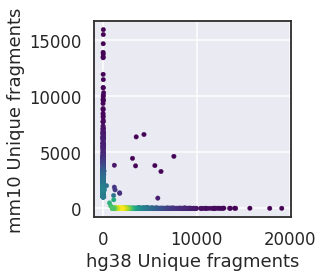

In [54]:
context = 'talk'
style = 'darkgrid'
sns.set_context(context)
sns.set_style(style, {'axes.linewidth': 1, 'axes.edgecolor':'.20'})
markersize=20

xvar = 'GRCh38'
yvar = 'mm10'

x=df_barnyard_subset_1[xvar]
y=df_barnyard_subset_1[yvar]

xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# bins = np.linspace(z.min(), z.max(), 10)
# digitized = np.digitize(z, bins)
# bin_means = [z[digitized == i].mean() for i in range(1, len(bins))]
# digitized_rescaled = np.interp(digitized, (digitized.min(), digitized.max()), (z.min(), z.max()))


ax = sns.scatterplot(data=df_barnyard_subset_1, x=xvar, y=yvar, hue=z, palette='viridis', edgecolor=None, s=markersize)
ax.set(xscale='linear')
ax.set(yscale='linear')
ax.set_aspect('equal', adjustable='box')
ax.set_aspect(1./ax.get_data_ratio())
ax.get_legend().remove()
plt.tight_layout()


ax.set_xlabel('hg38 Unique fragments')
ax.set_ylabel('mm10 Unique fragments')

fig = plt.gcf()
fig.savefig('plts_pub/barnyard_lin_5050only_markersize'+str(markersize)+'_ufrags.svg', dpi=100)
fig.savefig('plts_pub/barnyard_lin_5050only_markersize'+str(markersize)+'_ufrags.tiff', dpi=600, transparent=True)

In [42]:
fig.savefig('plts_pub/barnyard_lin_5050only_markersize'+str(markersize)+'.tiff', dpi=600, transparent=True)

# Statistics mentioned in the paper:

In [47]:
cutoff = 0.95
df_barnyard_subset_1['ratio'] = df_barnyard_subset_1['GRCh38']/df_barnyard_subset_1['sum']
df_barnyard_subset_1['species'] = 'mixed'
df_barnyard_subset_1['species'][df_barnyard_subset_1['ratio'] >=cutoff] = 'human'
df_barnyard_subset_1['species'][df_barnyard_subset_1['ratio'] <=1-cutoff] = 'mouse'
df_barnyard_subset_1['species'].value_counts()

/user/leuven/330/vsc33042/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/user/leuven/330/vsc33042/.local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


human    889
mouse    443
mixed     21
Name: species, dtype: int64

In [48]:
df_barnyard_subset_1['species'].value_counts()['mixed']/df_barnyard_subset_1['species'].count()

0.015521064301552107

In [49]:
df_barnyard_subset_1.median()

species
GRCh38    1680.000000
mm10         4.000000
sum       2705.000000
ratio        0.998861
dtype: float64

In [50]:
df_barnyard_subset_1

species,GRCh38,mm10,sum,ratio,species
bc,,,,,
AATGATGCGGCTCCAACTATACCAATATCG,19110,5,19115,0.999738,human
ATCCAGTGCAGACGTCTCCTAGAGAATGTC,17826,5,17831,0.999720,human
GTGTGAAGAATATGCAGTTACTGAGACCAA,33,15944,15977,0.002065,mouse
TACCTTCGATGCGGTGGTTAATGAATCGAG,15701,12,15713,0.999236,human
AGCTAACTACGTATTGAGCCCTTGGATTCA,30,15504,15534,0.001931,mouse
...,...,...,...,...,...
AGCTAACTACGAGCAGCGATGTGTTGAAGT,1007,1,1008,0.999008,human
CTATCTGCTTGTGAAGAGTAAGAGAATGTC,1005,1,1006,0.999006,human
CTATTAGGCTTGAAGCGAACCGTTATACGT,1004,0,1004,1.000000,human


The above number is reported in the paper.